# Project: Problem Statement - Personal Loan Campaign Modelling
Thera Bank Personal Loan Campaign
 
Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

### Domain:
Banking

 

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

### Attribute Information:
ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?
 

### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

Number of unique in each column?

Number of people with zero mortgage?

Number of people with zero credit card spending per month?

Value counts of all categorical columns.

Univariate and Bivariate

Get data model ready

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

6. Give conclusion related to the Business understanding of your model? (5 marks)



In [226]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error

In [227]:
TBdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
TBdata.shape

(5000, 14)

In [228]:
#Checking first 10 rows of Data set
TBdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [229]:
#Checking for any null or missing values
TBdata.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [230]:
#Checking data types
TBdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [231]:
#Checking the Statistical Summary
TBdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [232]:
#Identifying duplicates records in the data
dupes=TBdata.duplicated()
sum(dupes)
#No duplicates found

0

In [233]:
#Checking for any missing values for all the columns
pd.DataFrame(TBdata.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [234]:
## Checking whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.
TBdata[~TBdata.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [235]:
TBdata.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'], dtype=object)

In [236]:
#Unique values in each column
TBdata.Age.unique()# Ages look fine

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [237]:
TBdata.Experience.unique() #Negative values found below in the experience. they have to be checked

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [238]:
TBdata.Income.unique()#Incomes look fine

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [239]:
TBdata['ZIP Code'].unique()#ZIP Code looks fine

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [240]:
TBdata.Family.unique()#Family size looks fine

array([4, 3, 1, 2], dtype=int64)

In [241]:
TBdata.CCAvg.unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [242]:
TBdata.Education.unique()

array([1, 2, 3], dtype=int64)

In [243]:
TBdata.Mortgage.unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [244]:
TBdata['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [245]:
TBdata['Securities Account'].unique()

array([1, 0], dtype=int64)

In [246]:
TBdata['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [247]:
TBdata['CD Account'].unique()

array([0, 1], dtype=int64)

In [248]:
TBdata.Online.unique()

array([0, 1], dtype=int64)

In [249]:
TBdata.CreditCard.unique()

array([0, 1], dtype=int64)

In [250]:
# Number of People with zero mortgage
print("Number of people with zero mortgage=",(TBdata['Mortgage']==0.0).sum())

Number of people with zero mortgage= 3462


In [251]:
# Number of people with zero credit card spending per month
print("Number of people with zero credit card spending per month=",(TBdata['CCAvg']==0.0).sum())

Number of people with zero credit card spending per month= 106


In [252]:
# Dropping ID column as its not required
TBdata.drop('ID',axis=1,inplace=True)

In [253]:
# Categorical data value counts
# Our Categorical columns are:

# Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# Personal Loan 0 or 1
# Securities Account 0 or 1
# CD Account 0 or 1
# Online 0 or 1
# Credit card 0 or 1

# Changing data type to Category
TBdata['Education'] = TBdata['Education'].astype('category')
TBdata['Personal Loan'] = TBdata['Personal Loan'].astype('category')
TBdata['Securities Account'] = TBdata['Securities Account'].astype('category')
TBdata['CD Account'] = TBdata['CD Account'].astype('category')
TBdata['Online'] = TBdata['Online'].astype('category')
TBdata['CreditCard'] = TBdata['CreditCard'].astype('category')

In [254]:
TBdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.4 KB


In [255]:
# Value Counts for Cateorical variables

print("Value counts for","\n", "Education=\n",TBdata.Education.value_counts(),"\n")
print("Personal Loan=\n",TBdata['Personal Loan'].value_counts(),"\n")
print("Securities Account=\n",TBdata['Securities Account'].value_counts(),"\n")
print("CD Account=\n",TBdata['CD Account'].value_counts(),"\n")
print("Online=\n",TBdata.Online.value_counts(),"\n")
print("Credit Card=\n",TBdata.CreditCard.value_counts(),"\n")

Value counts for 
 Education=
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 

Personal Loan=
 0    4520
1     480
Name: Personal Loan, dtype: int64 

Securities Account=
 0    4478
1     522
Name: Securities Account, dtype: int64 

CD Account=
 0    4698
1     302
Name: CD Account, dtype: int64 

Online=
 1    2984
0    2016
Name: Online, dtype: int64 

Credit Card=
 0    3530
1    1470
Name: CreditCard, dtype: int64 



In [256]:
TBdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [257]:
#Checking the skewness of the data
TBdata.skew()

Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [258]:
TBdata.kurt()

Age                    -1.153067
Experience             -1.121523
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Personal Loan           5.529589
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64

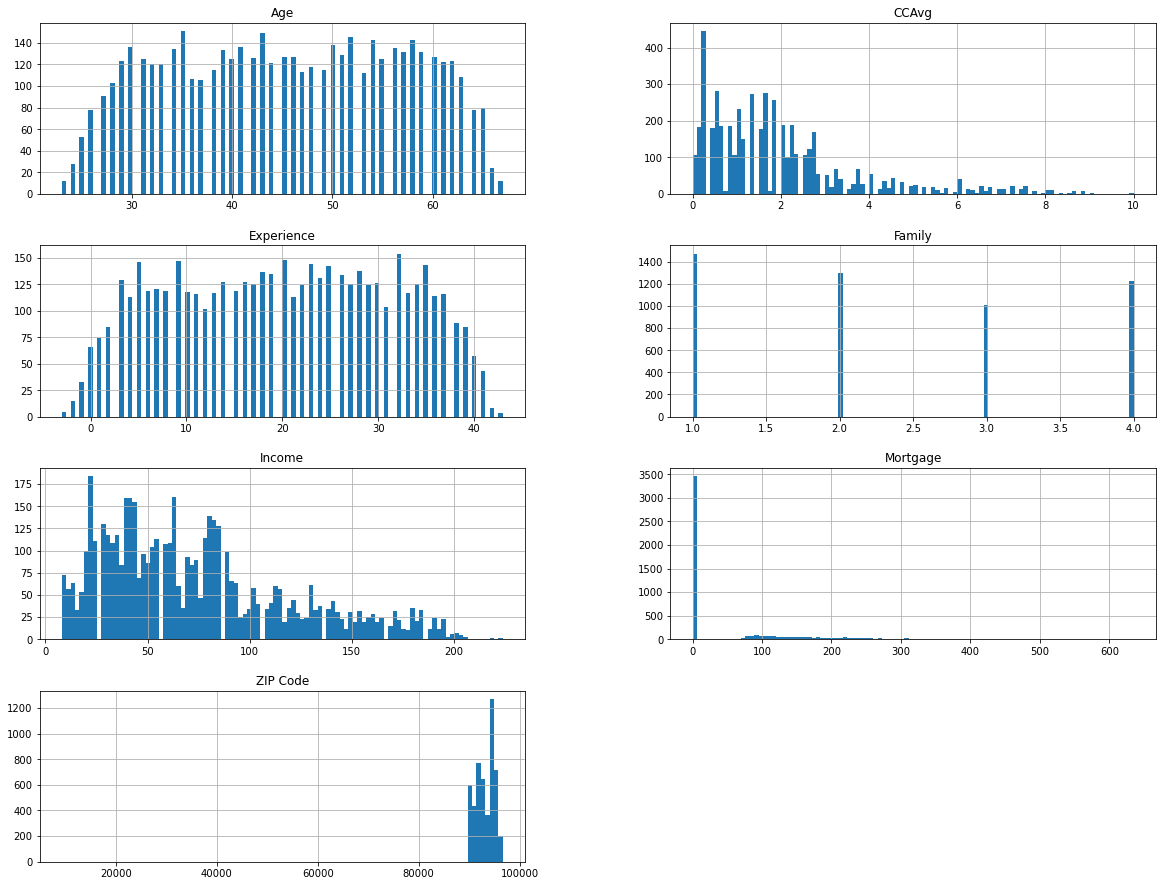

In [259]:
# Univariate analysis
columns = list(TBdata)[0:] 
TBdata[columns].hist(stacked=False, bins=100, figsize=(20,40), layout=(10,2));

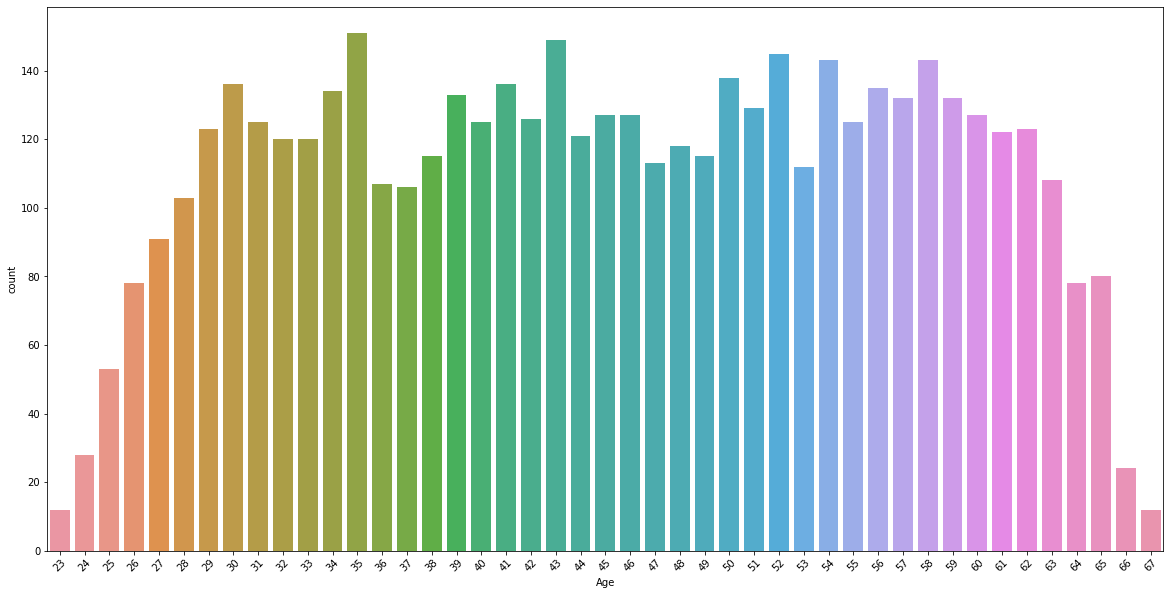

In [260]:
plt.figure(figsize=(20,10))
sns.countplot(TBdata['Age'])
plt.xticks(rotation=45)
plt.show()

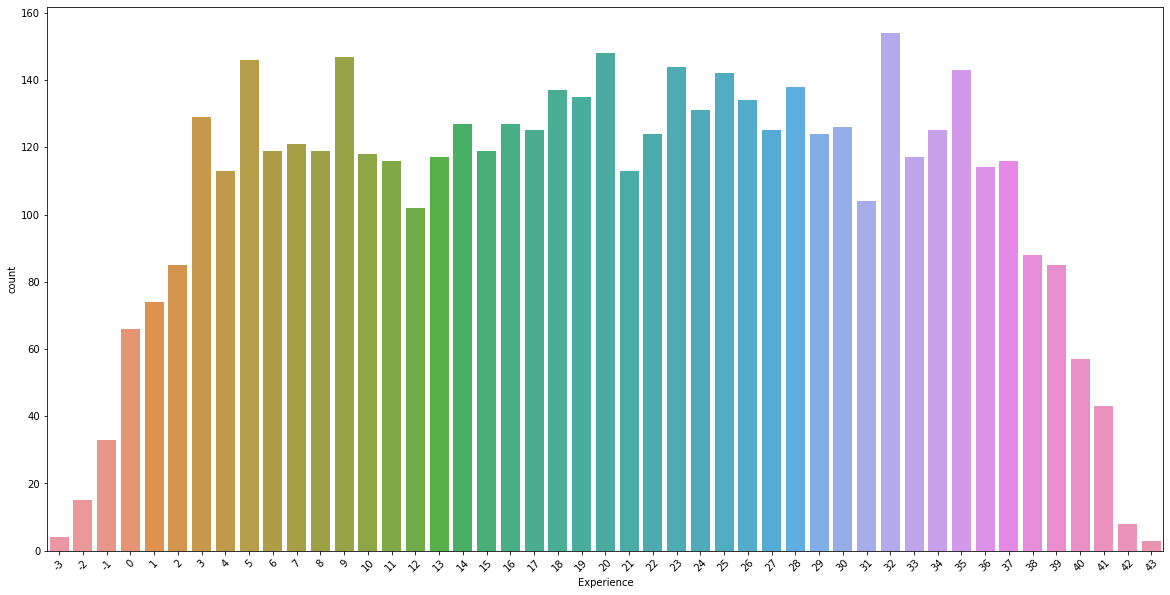

In [261]:
plt.figure(figsize=(20,10))
sns.countplot(TBdata['Experience'])
plt.xticks(rotation=45)
plt.show()

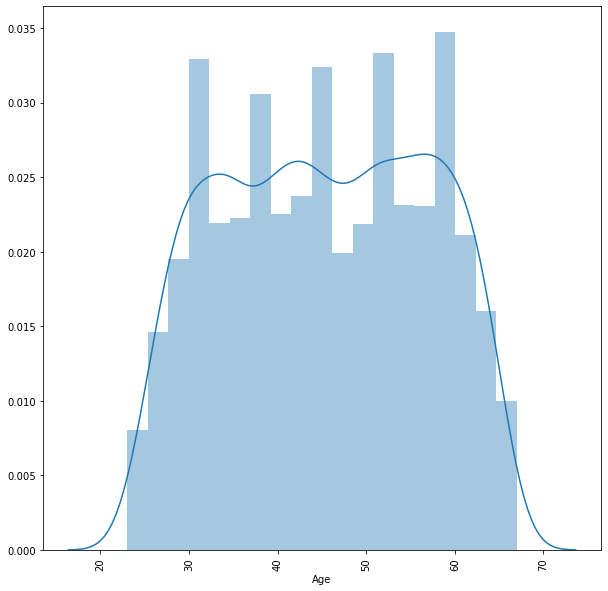

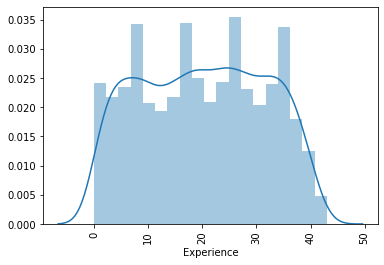

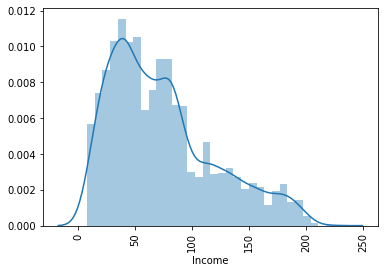

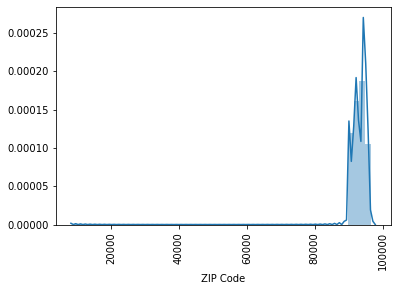

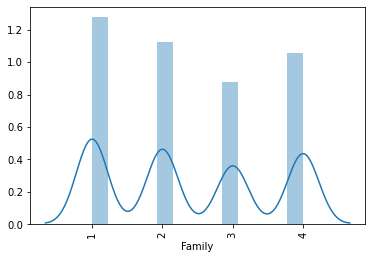

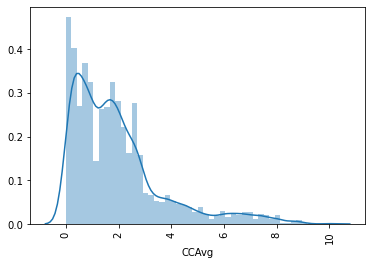

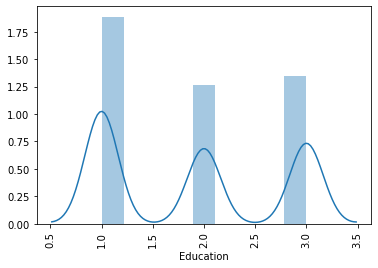

In [279]:
#Univariate analysis of different attributes using distplots
plt.figure(figsize=(10,10))
for i in ['Age','Experience','Income','ZIP Code','Family','CCAvg','Education']:
    sns.distplot(TBdata[i])
    plt.xticks(rotation=90)
    plt.show()

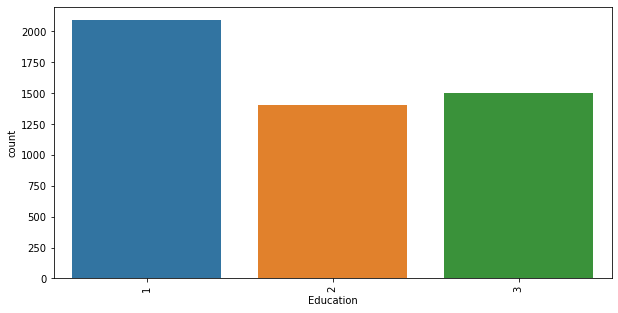

In [280]:
# Number of people per education class
plt.figure(figsize=(10,5))
sns.countplot(TBdata['Education'])
plt.xticks(rotation=90)
plt.show()

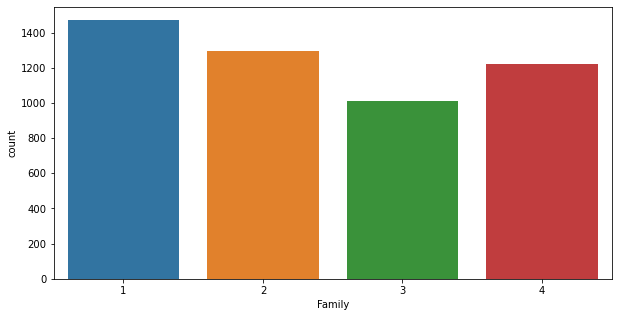

In [281]:
# Number of people with different family sizes
plt.figure(figsize=(10,5))
sns.countplot(TBdata['Family'])
plt.show()

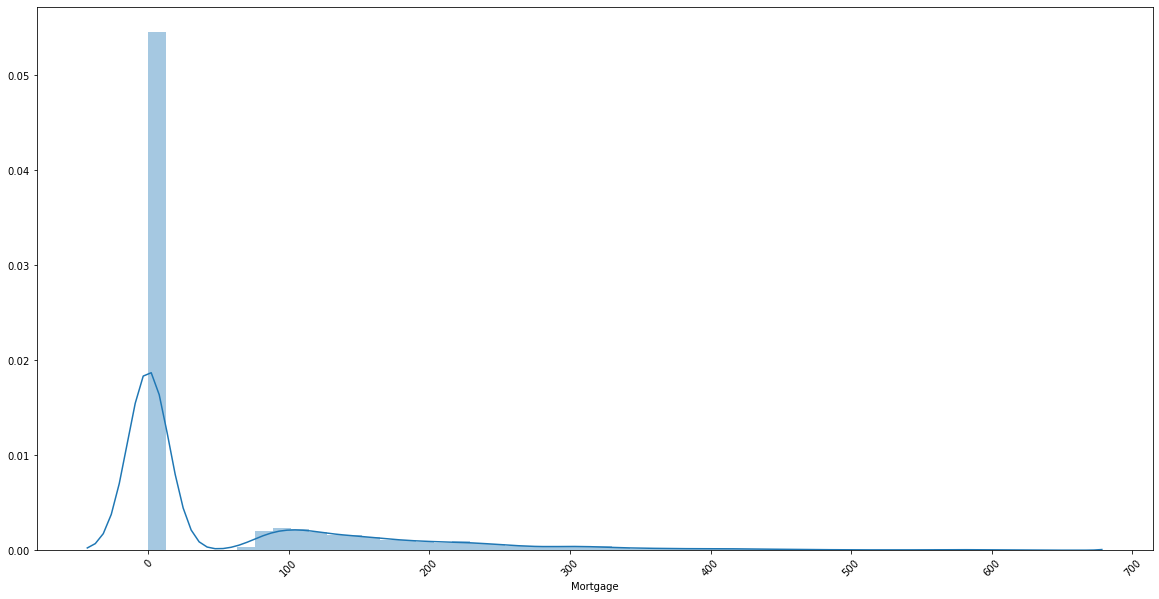

In [265]:
#Univariate analysis of mortgage data
plt.figure(figsize=(20,10))
sns.distplot(TBdata['Mortgage'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [282]:
#Bivariate analysis
#Correlation heat map
# Function for correlation
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    

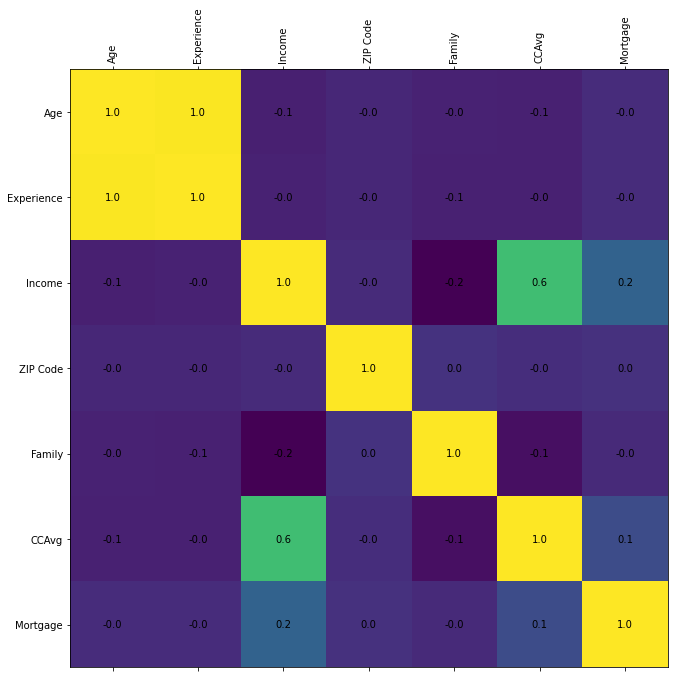

In [284]:
plot_corr(TBdata)

In [285]:
TBdata.corr()
# There is an interesting positive correlation between income and Mortgage
#There is correlation between Age and Experience for obvious reasons:More the age, more the experience

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
Age,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,-0.011097
Income,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,0.206806
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,0.007383
Family,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,-0.020445
CCAvg,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,0.109905
Mortgage,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,1.000000


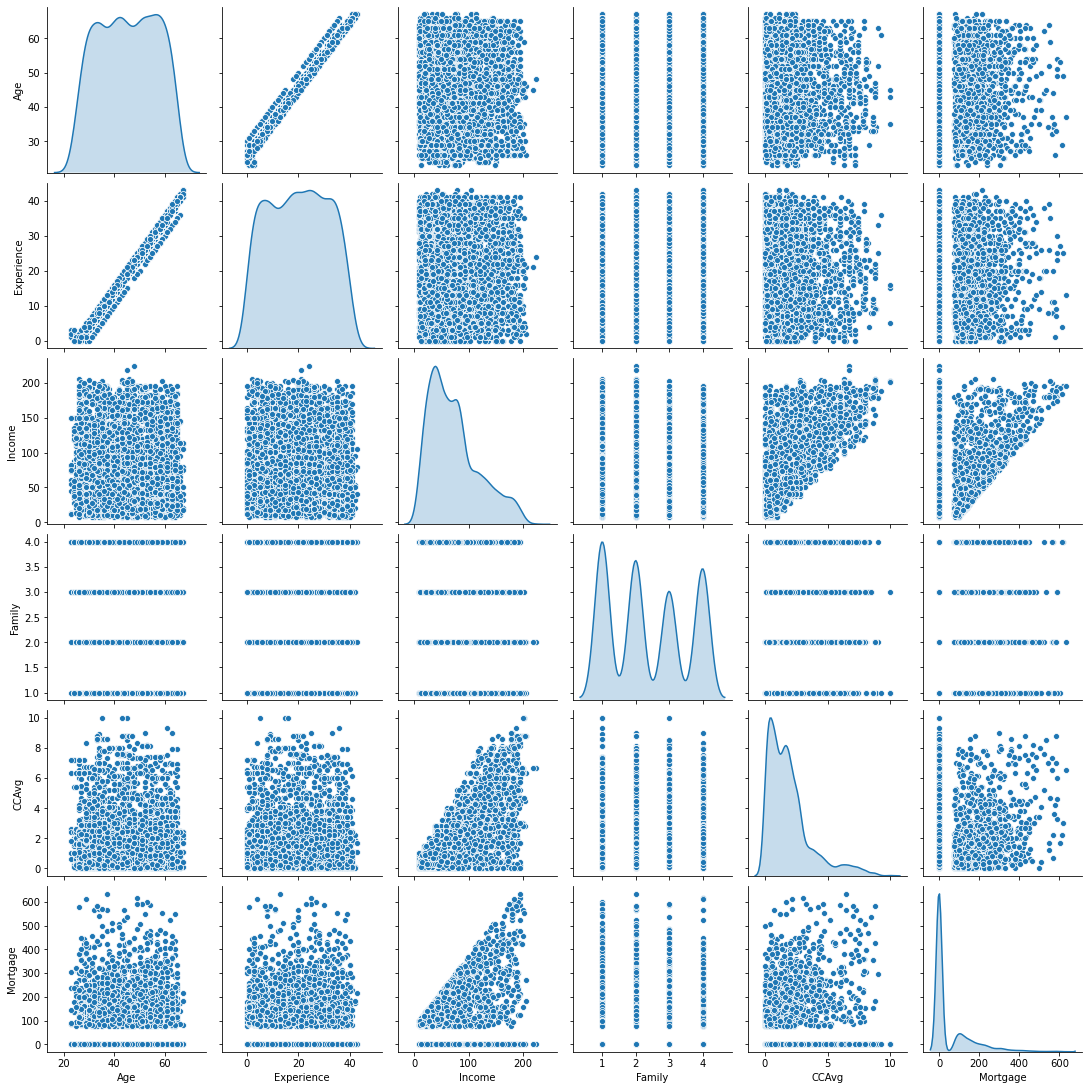

In [287]:
#Bivariate analysis using pairplot
TBdata_mod=TBdata.drop(['ZIP Code','Securities Account', 'CD Account','Online' ,'CreditCard','Education','Personal Loan'],axis=1)
# droping columns that are not needed for Bivariate pairplot analysis

sns.pairplot(TBdata_mod,diag_kind='kde');


In [267]:
#Before doing regression changing -ve values of mean to absolute values as we found in our initial analyss of each attribute
TBdata['Experience'] = TBdata['Experience'].abs()

In [268]:
TBdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [294]:
#Dropping data that is not needed anymore  like ZIP Code
TBdata1=TBdata.drop(['ZIP Code',],axis=1) # dropping ID and Zip code which dont have any impact on the data set

TBdata1['Education']=TBdata1['Education'].replace({1: 'Undergraduate', 2: 'Graduate',3: 'Advanced Pro'})
# converting categorical variables

TBdata1=pd.get_dummies(TBdata1,columns=['Education'])
# converting categorical values to numbers using dummies

TBdata1['Family']=TBdata1['Family'].replace({1: 'Single', 2: '2 ppl family',3: '3 ppl family', 4: '4 ppl family'})


TBdata1=pd.get_dummies(TBdata1,columns=['Family'])
TBdata1 # converting categorical values to numbers using dummies


,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced Pro,Education_Graduate,Education_Undergraduate,Family_2 ppl family,Family_3 ppl family,Family_4 ppl family,Family_Single
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0,1,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35,8,45,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,4,15,0.4,85,0,0,0,1,0,0,0,1,0,0,1,0
4997,63,39,24,0.3,0,0,0,0,0,0,1,0,0,1,0,0,0
4998,65,40,49,0.5,0,0,0,0,1,0,0,1,0,0,1,0,0


In [295]:
#Define X and Y variables
X = TBdata1.drop('Personal Loan',axis=1)

Y = TBdata1['Personal Loan']

In [296]:
# Splitting into training and test set with 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
print(X_train.head())
print(X_test.head())

      Age  Experience  Income  CCAvg  Mortgage Securities Account CD Account  \
717    59          34      94    0.5         0                  0          0   
2496   63          37      32    0.7       141                  0          0   
2469   43          18      89    0.1       307                  0          0   
1375   50          26     179    2.9         0                  0          0   
2742   39          14      89    0.4         0                  0          0   

     Online CreditCard  Education_Advanced Pro  Education_Graduate  \
717       0          1                       0                   0   
2496      0          0                       0                   1   
2469      0          1                       0                   1   
1375      0          1                       1                   0   
2742      1          0                       0                   0   

      Education_Undergraduate  Family_2 ppl family  Family_3 ppl family  \
717                    

In [297]:
# Split data check
print("{0:0.2f}% data is in training set".format((len(X_train)/len(TBdata1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(TBdata1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [298]:
# Personal loan check for 0 or 1 that is true or false ratio
print("Orig. Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(TBdata1.loc[TBdata1['Personal Loan'] == 1]), (len(TBdata1.loc[TBdata1['Personal Loan'] == 1])/len(TBdata1.index)) * 100))
print("Orig. Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(TBdata1.loc[TBdata1['Personal Loan'] == 0]), (len(TBdata1.loc[TBdata1['Personal Loan'] == 0])/len(TBdata1.index)) * 100))
print("")
print("Train Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Train Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


Orig. Personal Loan True Values    : 480 (9.60%)
Orig. Personal Loan False Values   : 4520 (90.40%)

Train Personal Loan True Values    : 342 (9.77%)
Train Personal Loan False Values   : 3158 (90.23%)

Test Personal Loan True Values     : 138 (9.20%)
Test Personal Loan False Values    : 1362 (90.80%)


In [299]:
#Logistics regression analysis

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

C:\Users\Gautam Mehra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7)

In [308]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")# You can remove solver="liblinear" , it will just give you the warning
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.247371  0.252138  0.055654  0.182807  0.000887 -0.470108  2.838408   

          7         8       9        10        11        12        13  \
0 -0.563766 -0.784632  0.8586  0.599242 -2.871244 -1.304655  0.619741   

         14       15  intercept  
0  0.485382 -1.21387  -1.413402  


In [310]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9646666666666667


In [311]:
# looking at predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced Pro,Education_Graduate,Education_Undergraduate,Family_2 ppl family,Family_3 ppl family,Family_4 ppl family,Family_Single,Observed Loan Status,Predicted Loan Status
3406,42,12,34,2.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
757,52,28,81,1.8,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4544,28,4,80,2.5,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3235,60,35,39,1.6,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [312]:

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9588571428571429

Testing accuracy 0.9626666666666667

Confusion Matrix


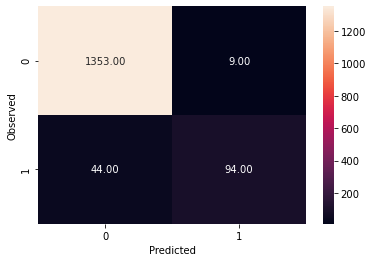

None

Recall: 0.6811594202898551

Precision: 0.912621359223301

F1 Score: 0.7800829875518673

Roc Auc Score: 0.8372757453872183


In [313]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [314]:
## Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
6,CD Account,2.76
11,Education_Undergraduate,2.41
9,Education_Advanced Pro,1.18
12,Family_2 ppl family,1.10
15,Family_Single,0.92
13,Family_3 ppl family,0.91
10,Education_Graduate,0.84
8,CreditCard,0.81
14,Family_4 ppl family,0.71
7,Online,0.61


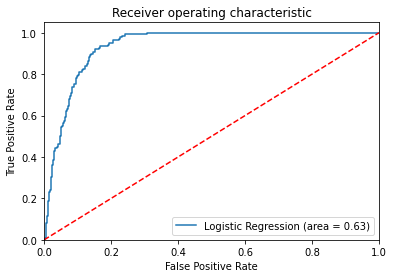

In [164]:

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [323]:
## Coefficients-Displaying in data frame 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
6,CD Account,2.76
11,Education_Undergraduate,2.41
9,Education_Advanced Pro,1.18
12,Family_2 ppl family,1.10
15,Family_Single,0.92
13,Family_3 ppl family,0.91
10,Education_Graduate,0.84
8,CreditCard,0.81
14,Family_4 ppl family,0.71
7,Online,0.61


In [320]:

#Running logistic regression across multiple parameters
#X_train, X_test, y_train, y_test
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print('Best Solver : ' + str(grid_clf_acc.best_params_))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

C:\Users\Gautam Mehra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gautam Mehra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Accuracy Score : 0.9646666666666667
Precision Score : 0.912621359223301
Recall Score : 0.6811594202898551
F1 Score : 0.7800829875518673
Best Solver : {'solver': 'liblinear'}


array([[1353,    9],
       [  44,   94]], dtype=int64)

#CONCLUSION Based on study of model and Confusin matrix

True Positives (observed=1,predicted=1) 94 customers:
Model predicts that these customer accepted personal loan offered based on last campaign data. These customers are the correct target and bank will be able to take advantage of this model to target their campaign towards these customers

False Positives (observed=0,predicted=1) 9 customers:
Predicted that the customer did accept personal loan offered and based on last campaign data the customer did not accept the personal loan offered. 

True Negatives (observed=0,predicted=0):1353 customers
Predicted that the customer did not accept personal loan offered and based on last campaign data the customer did not accept the personal loan offered. 

False Negatives (observed=1,predicted=0) 44 customers:
Predicted that the customer did not accept personal loan offered and based on last campaign data the customer did accept the personal loan offered. 

The bank wants to target the right customers by offering the loan to the people by creating a model developed by studying the customers who accepted the personal loan in last campaign i.e. less number of False Positive, if FP is high there is a chance that bank offers the personal loans to customers who will not accept the personal loan resulting in spending the money in marketing efforts that will have no potential returns. So in the final model we have to make sure there are least false positive predictions. Hence Precision is the important metric.
In case of false negatives bank will lose few customers but that effect is still minimal considering no exra cost is involved. 
This model can be implemented for practical use as this has high model score and it will benefit the bank by predicting the customers that will accept the personal loan. Model can be used for future and existing customers to target personal loan potentials
